# Task 1
- Load and Explore the Dataset
- Choose a dataset in CSV format (for example, you can use datasets like the Iris dataset, a sales dataset, or any dataset of your choice).
- Load the dataset using pandas.
- Display the first few rows of the dataset using .head() to inspect the data.
- Explore the structure of the dataset by checking the data types and any missing values.
- Clean the dataset by either filling or dropping any missing values.

In [5]:
import pandas as pd

# Load dataset using pandas

In [7]:
file_path = 'e-commerce.csv'
try:
    #read e-commerce.csv file
    df = pd.read_csv(file_path)
    print("CSV file loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except pd.errors.ParserError:
    print(f"Error: The file '{file_path}' could not be parsed (malformed CSV).")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

CSV file loaded successfully!


# Display the first few rows of the dataset using .head() to inspect the data

In [5]:
df.head(10)

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024
5,3fdcdae8,0816ee12-5,Books,241.86,50,120.93,UPI,08-08-2024
6,12772337,d41e0b55-c,Toys,76.91,5,73.06,Credit Card,28-03-2024
7,9f0194af,83b7dc04-5,Sports,213.23,20,170.58,Net Banking,29-05-2024
8,7a8559d8,87c9c896-1,Sports,379.81,5,360.82,Credit Card,26-02-2024
9,8911f0d1,31308875-b,Home & Kitchen,415.36,50,207.68,Net Banking,11-01-2024


## Explore the structure of the dataset by checking the data types and any missing values.

In [6]:
print(df.dtypes)

User_ID              object
Product_ID           object
Category             object
Price (Rs.)         float64
Discount (%)          int64
Final_Price(Rs.)    float64
Payment_Method       object
Purchase_Date        object
dtype: object


## check for missing values

In [7]:
print(df.isnull().sum())

User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64


# Task 2: Basic Data Analysis
- Compute the basic statistics of the numerical columns (e.g., mean, median, standard deviation) using .describe().
- Perform groupings on a categorical column (for example, species, region, or department) and compute the mean of a numerical column for each group.
- Identify any patterns or interesting findings from your analysis.

## Compute the basic statistics of the numerical columns (e.g., mean, median, standard deviation) using .describe()

In [8]:
print(df.describe())

       Price (Rs.)  Discount (%)  Final_Price(Rs.)
count  3660.000000   3660.000000       3660.000000
mean    254.800675     18.825137        206.906579
std     141.682621     14.731338        122.687844
min      10.090000      0.000000          5.890000
25%     134.012500      5.000000        104.512500
50%     253.845000     15.000000        199.185000
75%     377.595000     25.000000        304.117500
max     499.960000     50.000000        496.820000


## Perform groupings on a categorical column (for example, species, region, or department) and compute the mean of a numerical column for each group.

In [14]:
#group by category and calc the mean of discount
grouped_category=df.groupby('Category')['Discount (%)'].mean().sort_values(ascending=False)
#display the result
print(grouped_category)

Category
Home & Kitchen    19.608379
Sports            19.326923
Electronics       19.267068
Books             19.035581
Beauty            18.475248
Toys              18.126195
Clothing          17.919021
Name: Discount (%), dtype: float64


In [17]:
#group by payment method and calc the mean of price
grouped_payment=df.groupby('Payment_Method')['Price (Rs.)'].mean().sort_values(ascending=False)
#display the result
print(grouped_payment)

Payment_Method
Debit Card          258.155746
Cash on Delivery    257.043793
Net Banking         255.090782
UPI                 252.464610
Credit Card         251.572934
Name: Price (Rs.), dtype: float64


## Identify any patterns or interesting findings from your analysis.

1. The mean price is Rs. 254.800675, the mean discount  18.825137% and the final mean price is Rs.  206.906579
2. The product category with the highest discount is Home & kitchen with a mean of 19.608379
3. The payment method mostly using is Debit Card with Rs. 258.155746

# Task 3: Data Visualization
- Create at least four different types of visualizations:
- Line chart showing trends over time (for example, a time-series of sales data).
- Bar chart showing the comparison of a numerical value across categories (e.g., average petal length per species).
- Histogram of a numerical column to understand its distribution.
- Scatter plot to visualize the relationship between two numerical columns (e.g., sepal length vs. petal length).
- Customize your plots with titles, labels for axes, and legends where necessary.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Line chart showing trends over time (for example, a time-series of sales data).

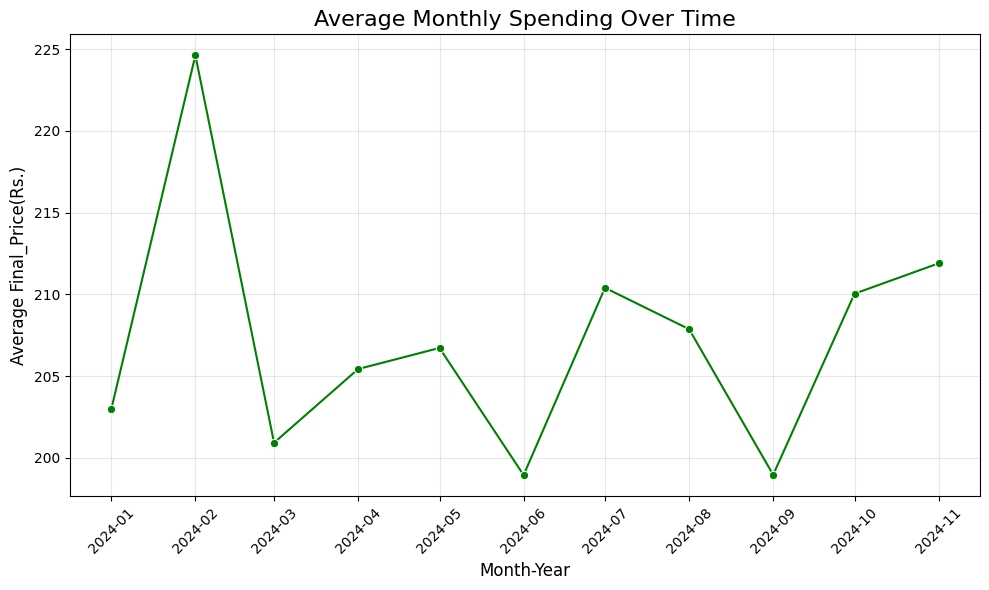

In [16]:

# Step 1: Convert the 'Purchase_Date' column to a proper datetime format
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format='%d-%m-%Y')

# Step 2: Add a new column for the month and year (for grouping by month)
df['Month_Year'] = df['Purchase_Date'].dt.to_period('M')  # Converts dates to month-year format

# Step 3: Group by Month_Year and calculate the mean of 'Final_Price (Rs.)'
monthly_mean = df.groupby('Month_Year')['Final_Price(Rs.)'].mean().reset_index()

# Convert Month_Year back to datetime for proper plotting
monthly_mean['Month_Year'] = monthly_mean['Month_Year'].dt.to_timestamp()

# Step 4: Plot the monthly mean spending
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.lineplot(data=monthly_mean, x='Month_Year', y='Final_Price(Rs.)', marker='o', color='green')

# Add a title and labels to the chart
plt.title('Average Monthly Spending Over Time', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Average Final_Price(Rs.)', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a grid for better visualization
plt.grid(alpha=0.3)

# Adjust the layout to make the plot fit neatly
plt.tight_layout()

# Step 5: Display the plot
plt.show()

## Bar chart showing the comparison of a numerical value across categories

C:\Users\Amy\AppData\Local\Temp\ipykernel_12192\1964513883.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_totals, x='Category', y='Final_Price(Rs.)', palette='viridis')


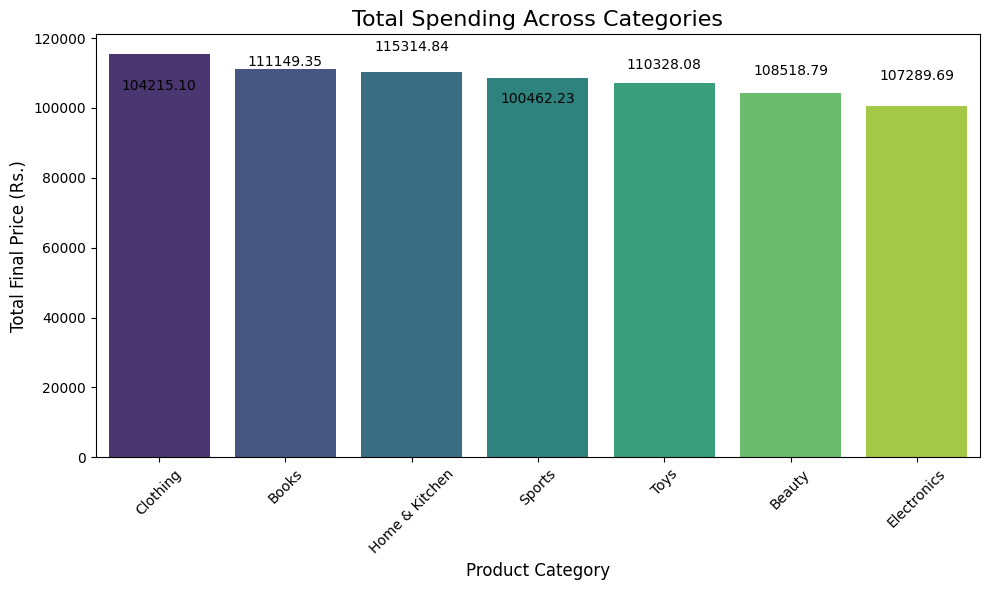

In [13]:
# Step 1: Group the data by 'Category' and calculate the total or average 'Final_Price (Rs.)'
# You can switch between 'mean' and 'sum' depending on whether you want average or total spending per category.
category_totals = df.groupby('Category')['Final_Price(Rs.)'].sum().reset_index()

# Step 2: Sort the categories by total spending for better visualization
category_totals = category_totals.sort_values(by='Final_Price(Rs.)', ascending=False)

# Step 3: Plot the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size

# Use seaborn to create a barplot
sns.barplot(data=category_totals, x='Category', y='Final_Price(Rs.)', palette='viridis')

# Add a title and labels
plt.title('Total Spending Across Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Final Price (Rs.)', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add the exact values on top of each bar
for index, row in category_totals.iterrows():
    plt.text(index, row['Final_Price(Rs.)'], f"{row['Final_Price(Rs.)']:.2f}", 
             ha='center', va='bottom', fontsize=10)

# Step 4: Display the bar chart
plt.tight_layout()  # Adjust layout for neatness
plt.show()


## Histogram of a numerical column to understand its distribution.

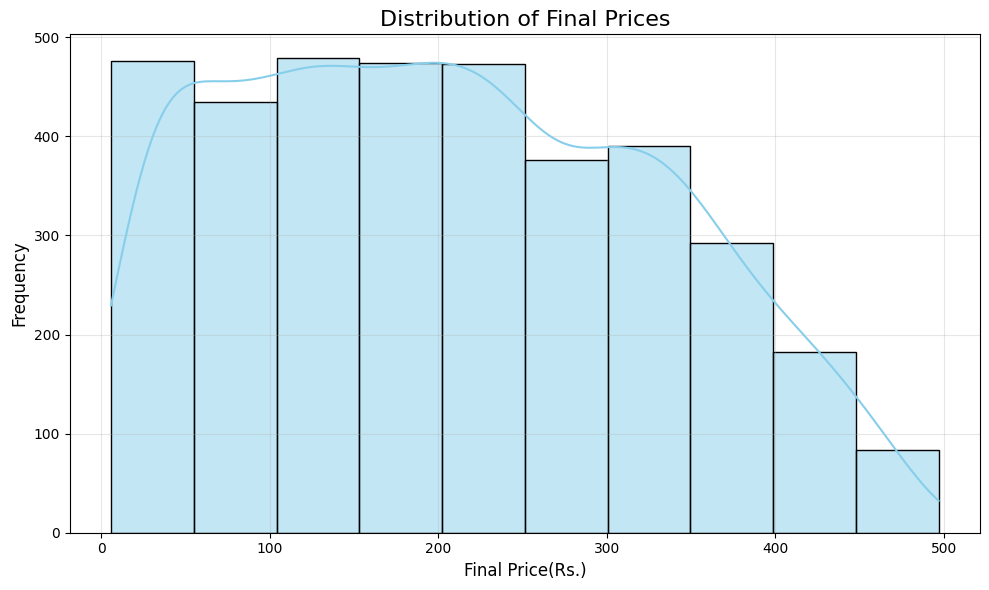

In [14]:
# Step 1: Plot the histogram
plt.figure(figsize=(10, 6))  # Set the figure size

# Use seaborn to create a histogram
sns.histplot(df['Final_Price(Rs.)'], bins=10, kde=True, color='skyblue')

# Add a title and labels
plt.title('Distribution of Final Prices', fontsize=16)
plt.xlabel('Final Price(Rs.)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add gridlines for better readability
plt.grid(alpha=0.3)

# Step 2: Display the histogram
plt.tight_layout()  # Adjust layout for neatness
plt.show()


## Scatter plot to visualize the relationship between two numerical columns

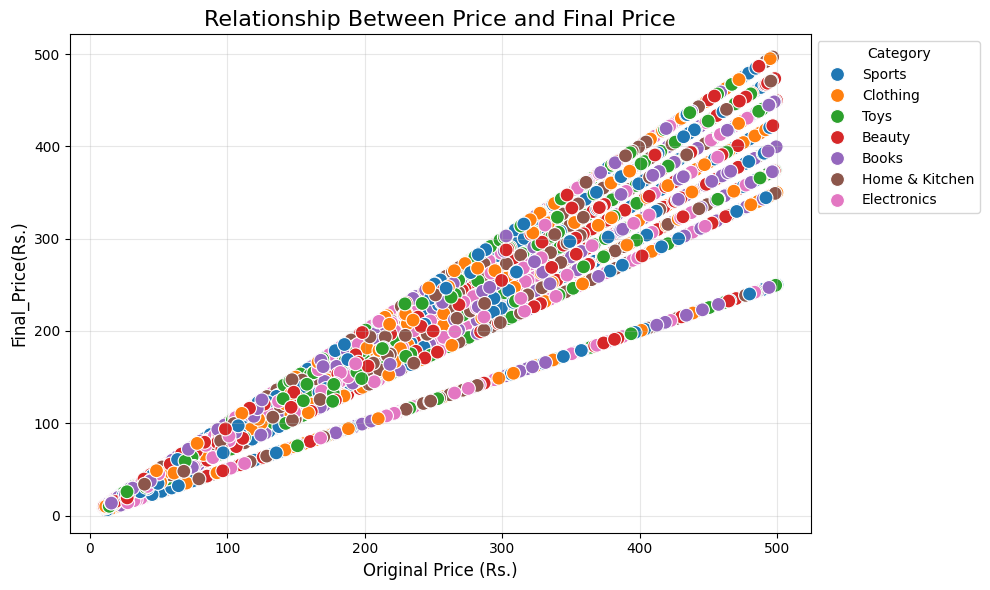

In [15]:
# Step 1: Plot the scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Use seaborn to create a scatter plot
sns.scatterplot(data=df, x='Price (Rs.)', y='Final_Price(Rs.)', hue='Category', palette='tab10', s=100)

# Add a title and axis labels
plt.title('Relationship Between Price and Final Price', fontsize=16)
plt.xlabel('Original Price (Rs.)', fontsize=12)
plt.ylabel('Final_Price(Rs.)', fontsize=12)

# Add a grid for better visualization
plt.grid(alpha=0.3)

# Customize legend position
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))

# Step 2: Display the scatter plot
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()
